# Desafio 2

#### Exercício 1:  Faça a leitura inicial dos dados e explore suas informações, estude seus tipos, sua forma e apresente uma análise inicial das medidas de dispersão de seus atributos.

In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, r2_score

import statsmodels
import statsmodels.api as sm


In [312]:
df_penguins = pd.read_csv('penguins.csv')
display(df_penguins.shape)
df_penguins.head()

(344, 7)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [313]:
df_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


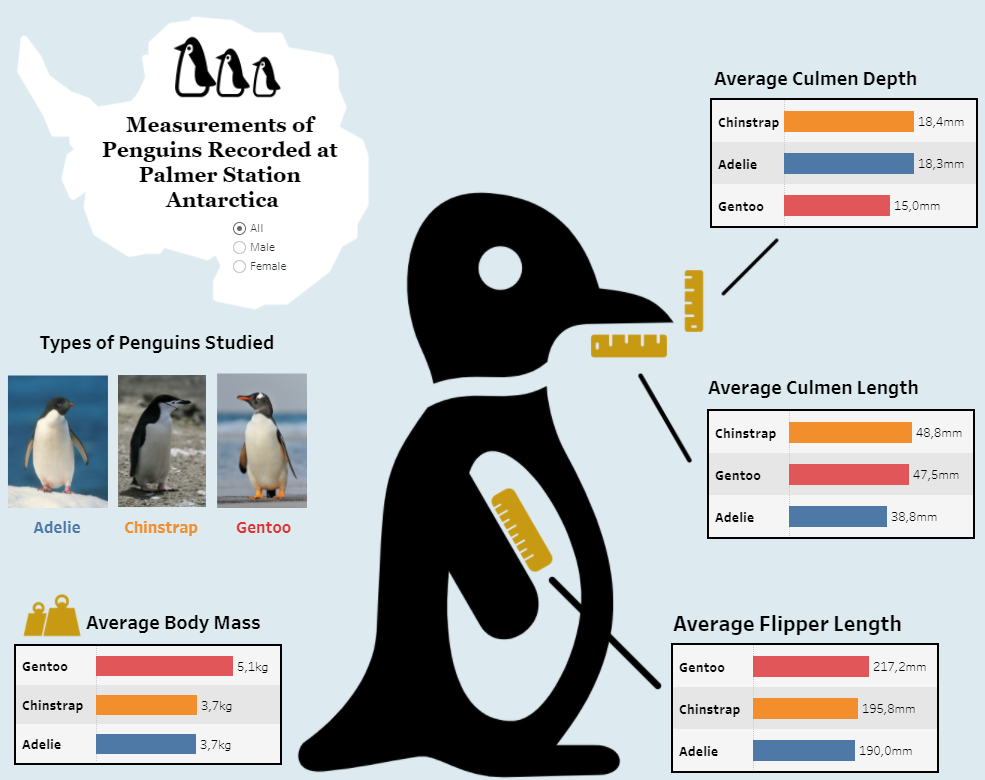

In [314]:
df_penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [315]:
display(df_penguins.species.unique())
display(df_penguins.island.unique())
display(df_penguins.sex.unique())

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

array(['MALE', 'FEMALE', nan], dtype=object)

In [316]:
display(df_penguins.count())
print("****")
display(df_penguins.isna().sum())
print("****")
display(df_penguins.duplicated().sum())

species              344
island               344
culmen_length_mm     342
culmen_depth_mm      342
flipper_length_mm    342
body_mass_g          342
sex                  333
dtype: int64

****


species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

****


0

In [317]:
df_penguins['culmen_length_mm'].fillna(df_penguins['culmen_length_mm'].mean(),inplace=True)
df_penguins['culmen_depth_mm'].fillna(df_penguins['culmen_depth_mm'].mean(),inplace=True)
df_penguins['flipper_length_mm'].fillna(df_penguins['flipper_length_mm'].mean(),inplace=True)
df_penguins['body_mass_g'].fillna(df_penguins['body_mass_g'].mean(),inplace=True)

In [318]:
df_penguins.loc[df_penguins['sex'].isna()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
8,Adelie,Torgersen,34.10000,18.10000,193.000000,3475.000000,NaN
9,Adelie,Torgersen,42.00000,20.20000,190.000000,4250.000000,NaN
10,Adelie,Torgersen,37.80000,17.10000,186.000000,3300.000000,NaN
11,Adelie,Torgersen,37.80000,17.30000,180.000000,3700.000000,NaN
47,Adelie,Dream,37.50000,18.90000,179.000000,2975.000000,NaN
246,Gentoo,Biscoe,44.50000,14.30000,216.000000,4100.000000,NaN
286,Gentoo,Biscoe,46.20000,14.40000,214.000000,4650.000000,NaN
324,Gentoo,Biscoe,47.30000,13.80000,216.000000,4725.000000,NaN
336,Gentoo,Biscoe,44.50000,15.70000,217.000000,4875.000000,NaN


In [319]:
df_penguins.groupby(["species","sex"])["body_mass_g"].median()

species    sex   
Adelie     FEMALE    3400.0
           MALE      4000.0
Chinstrap  FEMALE    3550.0
           MALE      3950.0
Gentoo     FEMALE    4700.0
           MALE      5500.0
Name: body_mass_g, dtype: float64

In [320]:
#Exercicio de iteração com o Dataframe

for index, row in df_penguins.iterrows():
    if row['sex'] != "FEMALE" and row['sex'] != "MALE":
        if row['species']=="Adelie":
            if row['body_mass_g']>3400:
                df_penguins.loc[index,'sex'] = "MALE"
            else:
                df_penguins.loc[index,'sex'] = "FEMALE"
        elif row['species']=="Gentoo":
            if row['body_mass_g']>4700:
                df_penguins.loc[index,'sex'] = "MALE"
            else:
                df_penguins.loc[index,'sex'] = "FEMALE"
display(df_penguins.count())
print("****")
display(df_penguins.isna().sum())
print("****")
display(df_penguins.sex.unique())  
print("****")

species              344
island               344
culmen_length_mm     344
culmen_depth_mm      344
flipper_length_mm    344
body_mass_g          344
sex                  344
dtype: int64

****


species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

****


array(['MALE', 'FEMALE'], dtype=object)

****


#### Exercício 2:  Imprima as matrizes de covariância e de correlação do `dataframe` e avalie as relações entre os atributos.

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<Figure size 360x360 with 0 Axes>

<AxesSubplot:>

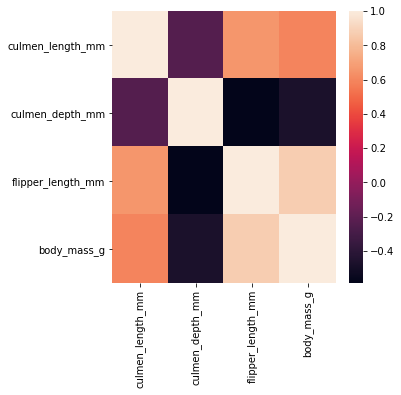

In [321]:
#Correlação entre as features
display(df_penguins.corr())
display(plt.figure(figsize=(5,5)))
display(sns.heatmap(df_penguins.corr()))

#### Exercício 3: Gere gráficos de boxplots para todos os elementos numéricos do dataframe.

<AxesSubplot:>

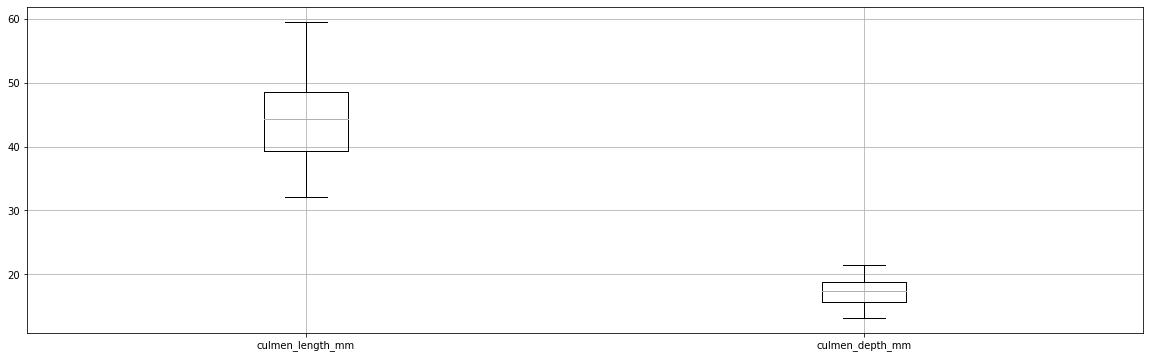

In [322]:
df_penguins.boxplot(column=['culmen_length_mm','culmen_depth_mm'],figsize=(20,6))

<AxesSubplot:>

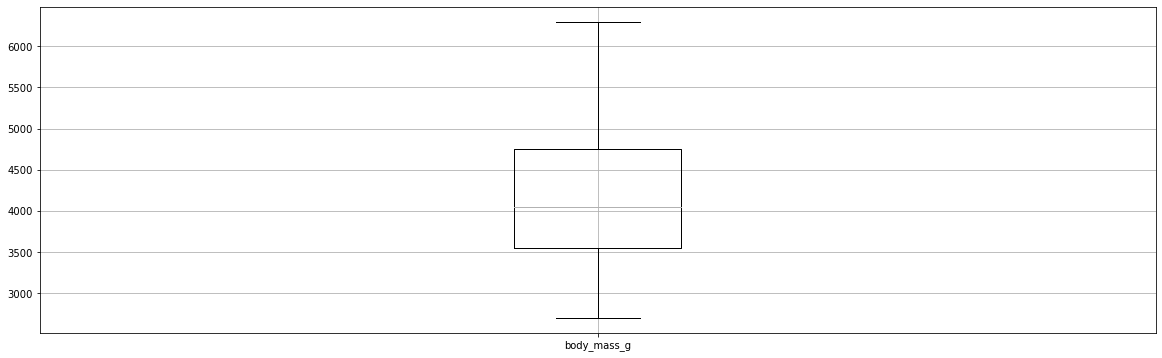

In [323]:
df_penguins.boxplot(column=['body_mass_g'],figsize=(20,6))

<AxesSubplot:>

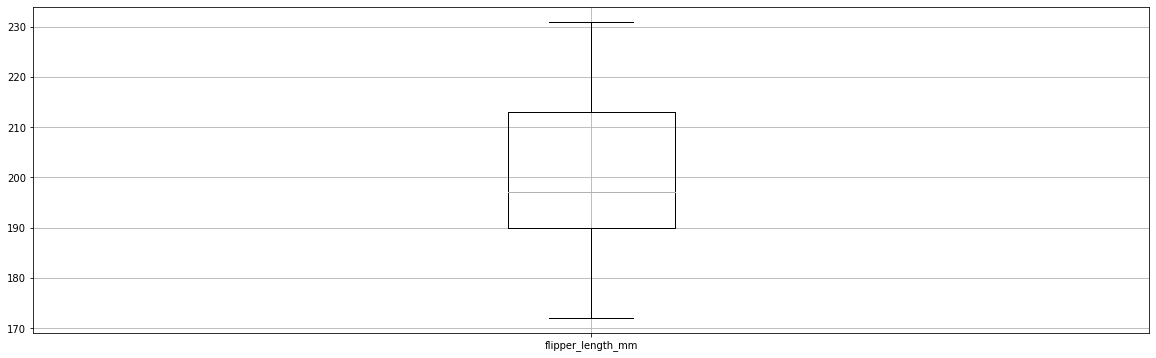

In [324]:
df_penguins.boxplot(column=['flipper_length_mm'],figsize=(20,6))

#### Exercício 4: Plote um gráfico de dispersão entre as colunas `'body_mass_g'` e `'flipper_length_mm'`, de modo a observar a origem do animal e seu sexo. Discuta suas observações.

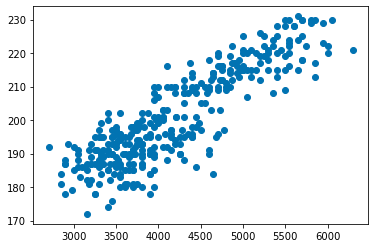

In [325]:
plt.scatter(df_penguins.body_mass_g,df_penguins.flipper_length_mm,)

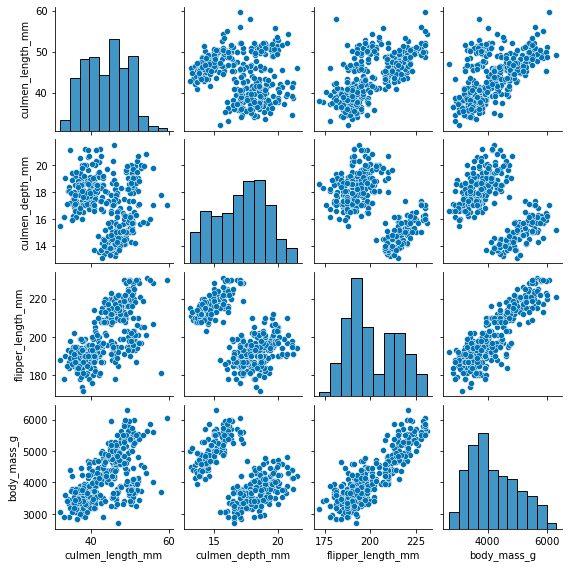

In [326]:
sns.set_palette('colorblind')
sns.pairplot(data=df_penguins, height=2)

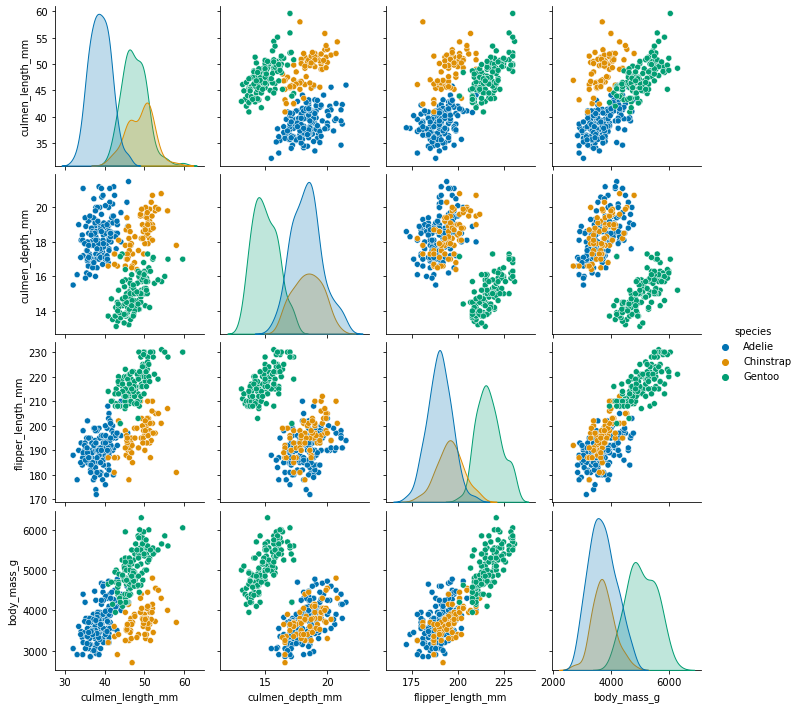

In [327]:
sns.pairplot(df_penguins, hue="species")

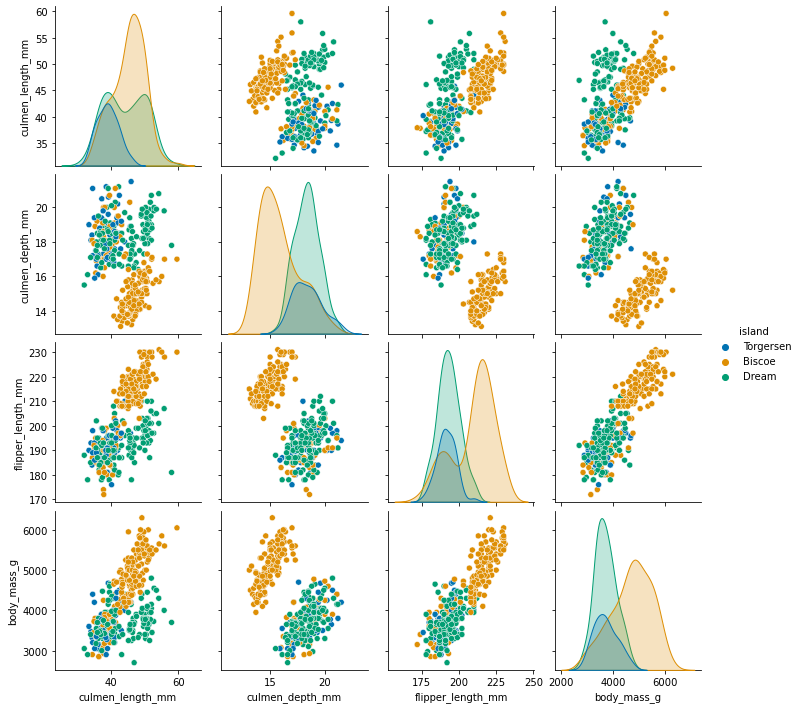

In [328]:
sns.pairplot(df_penguins, hue="island")

In [329]:
#Exercicio de iteração com o Dataframe
df_island_spc = df_penguins
df_island_spc['isl_spc']=""

for index, row in df_island_spc.iterrows():
    df_island_spc.loc[index,'isl_spc'] = df_island_spc.loc[index,'island']+"_"+df_island_spc.loc[index,'species']
display(df_island_spc.count())
print("****")
display(df_island_spc.isna().sum())
print("****")
display(df_island_spc.isl_spc.unique())  
print("****")

species              344
island               344
culmen_length_mm     344
culmen_depth_mm      344
flipper_length_mm    344
body_mass_g          344
sex                  344
isl_spc              344
dtype: int64

****


species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
isl_spc              0
dtype: int64

****


array(['Torgersen_Adelie', 'Biscoe_Adelie', 'Dream_Adelie',
       'Dream_Chinstrap', 'Biscoe_Gentoo'], dtype=object)

****


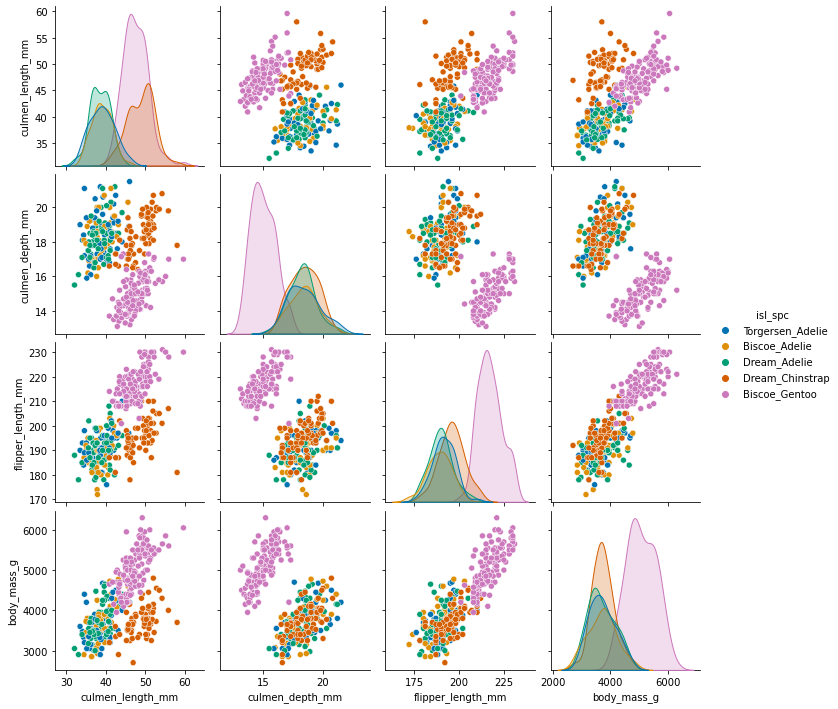

In [330]:
sns.pairplot(df_island_spc, hue="isl_spc")

#### Exercício 5: Carregue o dataframe `penguins` utilizando a função [`seaborn.load_dataset()`](https://seaborn.pydata.org/generated/seaborn.load_dataset.html), realize uma análise exploratória rápida e estude a relação entre os atributos `flipper_length_mm` e `body_mass_g`, para então propor um modelo de regressão linear simples para essa relação.

#### Plote novamente a dispersão entre `flipper_length_mm` e `body_mass_g`, juntamente com a curva de regressão e imprima os coeficientes calculados na tela.

In [331]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


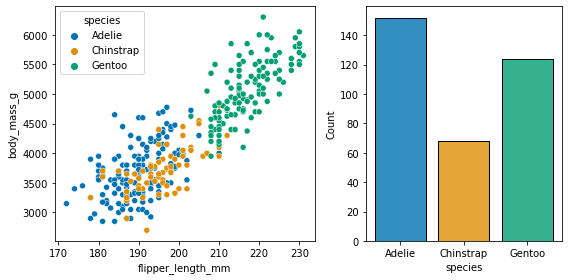

In [332]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="body_mass_g", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

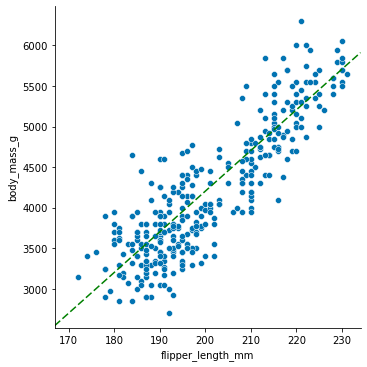

In [333]:
graf = sns.relplot(data=penguins, x="flipper_length_mm", y="body_mass_g")
graf.ax.axline(xy1=(170, 2700), slope=50.15, color="g", dashes=(5, 2))

In [334]:
penguins.dropna(inplace=True)
penguins.drop(['species','island','sex'],axis=1, inplace=True)
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [335]:
df_train, df_test = train_test_split(penguins, train_size = 0.7, test_size = 0.3, random_state = 1)

In [336]:
scaler = MinMaxScaler()
df_train = scaler.fit_transform(df_train)

In [337]:
X_train =df_train[:,0:-1] 
y_train = df_train[:,-1:]

lr = LinearRegression()
lr.fit(X_train, y_train)


df_test = scaler.fit_transform(df_test)

X_test = df_test[:,0:-1]
y_test = df_test[:,-1:]
                                                 
y_pred = lr.predict(X_test)
print("Resultado")
print(f"R2 train: {round(lr.score(X_train,y_train),4)}")
print(f"R2 test: {round(lr.score(X_test,y_test),4)}")

Resultado
R2 train: 0.7806
R2 test: 0.6991


(0.0, 1.0)

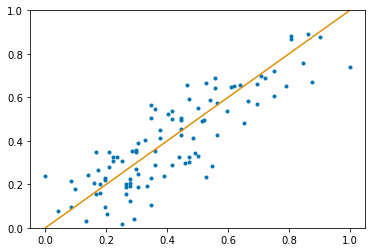

In [338]:
plt.plot(y_test,y_pred,'.')
plt.plot([0,1],[0,1])
plt.ylim([0,1])

In [339]:
print('Intercept:', lr.intercept_)
print('Coefficients:', lr.coef_)
print('R_Quadrado: ',lr.score(X_test,y_test))


Intercept: [-0.04876042]
Coefficients: [[0.05810192 0.03108571 0.89195034]]
R_Quadrado:  0.6990846030706059


#### Exercício 6: Ainda considerando o dataset `penguins.csv` considere as seguintes combinações de múltiplos atributos: 

- ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'sex'])
- ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm'])
- ['culmen_length_mm', 'culmen_depth_mm'])
- ['culmen_length_mm'])

#### e submeta os mesmos à regressão linear múltipla, comparando as métricas:

- MAE
- MSE
- RMSE
- R2

#### para cada combinação. Discuta os resultados.

In [341]:
sex_dummies = pd.get_dummies(df_penguins['sex'], drop_first=True)
df_penguins = pd.concat([df_penguins,sex_dummies],axis=1)
df_penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,isl_spc,MALE
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE,Torgersen_Adelie,1
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE,Torgersen_Adelie,0
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE,Torgersen_Adelie,0
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE,Torgersen_Adelie,1
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE,Torgersen_Adelie,0


In [342]:
penguins_est3 = df_penguins
X = penguins_est3 [['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',"MALE"]]
y = penguins_est3 ['body_mass_g']
# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)
# Initialização do modelo e fit
model = regr.fit(X, y)
skl_preds = model.predict(X)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

print('Mean Absolute Error:', metrics.mean_absolute_error(y,skl_preds))
print('Mean Squared Error:', metrics.mean_squared_error(y,skl_preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,skl_preds)))
print('R_Squared: ',model.score(X,y))

Intercept: -2461.1476794261216
Coefficients: [ -0.83006996 -79.2939171   38.80196478 520.82205807]
Mean Absolute Error: 277.0768974893914
Mean Squared Error: 115534.17952184567
Root Mean Squared Error: 339.90319139697067
R_Squared:  0.8187762753773833


In [343]:
X = penguins_est3 [['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',"MALE"]]
X = sm.add_constant(X) # adding a constant
olsmod = sm.OLS(penguins_est3 ['body_mass_g'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     382.9
Date:                Sun, 18 Jul 2021   Prob (F-statistic):          2.59e-124
Time:                        14:21:56   Log-Likelihood:                -2493.2
No. Observations:                 344   AIC:                             4996.
Df Residuals:                     339   BIC:                             5016.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2461.1477    620.77

In [344]:
penguins_est3['body_pred'] = olsmod.predict(X)
penguins_est3['residual'] = olsmod.resid
penguins_est3.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,isl_spc,MALE,body_pred,residual
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE,Torgersen_Adelie,1,3567.578018,182.421982
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE,Torgersen_Adelie,0,3343.515848,456.484152
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE,Torgersen_Adelie,0,3644.493125,-394.493125
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE,Torgersen_Adelie,1,4459.137380,-257.382994
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE,Torgersen_Adelie,0,3466.795355,-16.795355


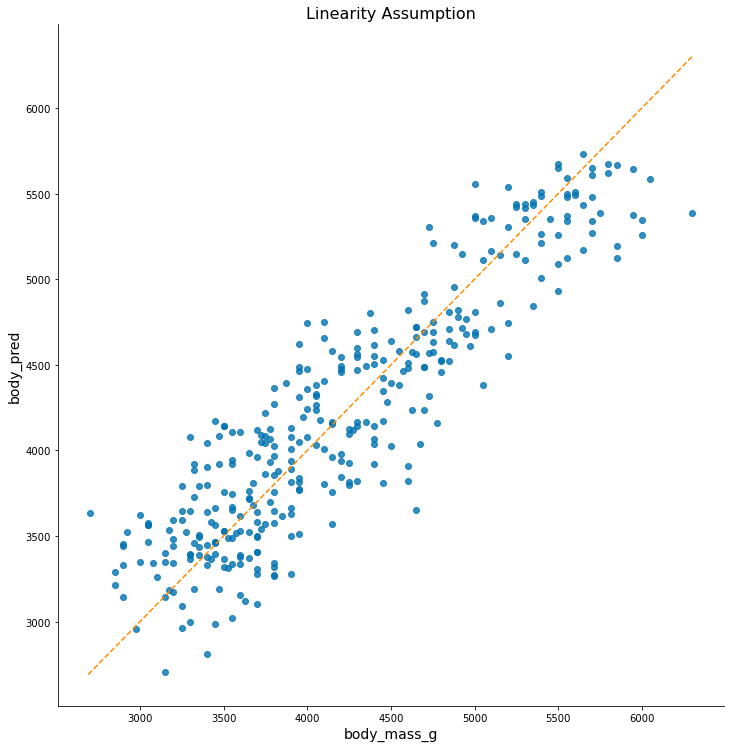

In [345]:
# Plot real x predição
sns.lmplot(x='body_mass_g', y='body_pred', data=penguins_est3, fit_reg=False, height=10)
    
# linha
line_coords = np.arange(penguins_est3[['body_mass_g','body_pred']].min().min()-10, 
                        penguins_est3[['body_mass_g','body_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('body_pred', fontsize=14)
plt.xlabel('body_mass_g', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

In [346]:
penguins_est2 = df_penguins
X = penguins_est2 [['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']]
y = penguins_est2 ['body_mass_g']
# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)
skl_preds = model.predict(X)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

print('Mean Absolute Error:', metrics.mean_absolute_error(y,skl_preds))
print('Mean Squared Error:', metrics.mean_squared_error(y,skl_preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,skl_preds)))
print('R_Squared: ',model.score(X,y))

Intercept: -6424.764698098583
Coefficients: [ 4.16182047 20.04953313 50.26922164]
Mean Absolute Error: 308.6527288162561
Mean Squared Error: 152067.90372225927
Root Mean Squared Error: 389.9588487549158
R_Squared:  0.7614704841272494


In [347]:
X = penguins_est2[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']]
X = sm.add_constant(X) # adding a constant
olsmod = sm.OLS(penguins_est2['body_mass_g'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     361.8
Date:                Sun, 18 Jul 2021   Prob (F-statistic):          1.96e-105
Time:                        14:22:12   Log-Likelihood:                -2540.4
No. Observations:                 344   AIC:                             5089.
Df Residuals:                     340   BIC:                             5104.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6424.7647    559.81

In [348]:
penguins_est2['body_pred'] = olsmod.predict(X)
penguins_est2['residual'] = olsmod.resid
penguins_est2.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,isl_spc,MALE,body_pred,residual
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE,Torgersen_Adelie,1,3211.617868,5.383821e+02
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE,Torgersen_Adelie,0,3438.564312,3.614357e+02
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE,Torgersen_Adelie,0,3906.346483,-6.563465e+02
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE,Torgersen_Adelie,1,4201.754386,-7.275958e-12
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE,Torgersen_Adelie,0,3816.889879,-3.668899e+02


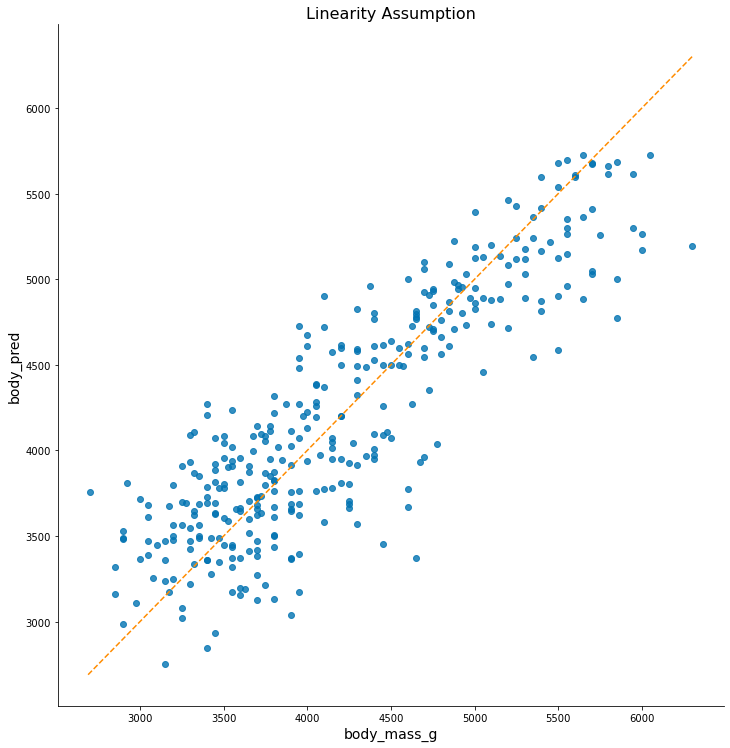

In [349]:
# Plot real x predição
sns.lmplot(x='body_mass_g', y='body_pred', data=penguins_est2, fit_reg=False, height=10)
    
# linha
line_coords = np.arange(penguins_est2[['body_mass_g','body_pred']].min().min()-10, 
                        penguins_est2[['body_mass_g','body_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('body_pred', fontsize=14)
plt.xlabel('body_mass_g', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

In [350]:
penguins_est1 = df_penguins
X = penguins_est1[['culmen_length_mm', 'culmen_depth_mm']]
y = penguins_est1['body_mass_g']
# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)
skl_preds = model.predict(X)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

print('Mean Absolute Error:', metrics.mean_absolute_error(y,skl_preds))
print('Mean Squared Error:', metrics.mean_squared_error(y,skl_preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,skl_preds)))
print('R_Squared: ',model.score(X,y))

Intercept: 3343.135903679751
Coefficients: [  75.28081538 -142.72264029]
Mean Absolute Error: 473.8574809953931
Mean Squared Error: 337345.5115827531
Root Mean Squared Error: 580.8145242525819
R_Squared:  0.47084914311276216


In [351]:
X = penguins_est1[['culmen_length_mm', 'culmen_depth_mm']]
X = sm.add_constant(X) # adding a constant
olsmod = sm.OLS(penguins_est1['body_mass_g'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     151.7
Date:                Sun, 18 Jul 2021   Prob (F-statistic):           7.42e-48
Time:                        14:22:28   Log-Likelihood:                -2677.5
No. Observations:                 344   AIC:                             5361.
Df Residuals:                     341   BIC:                             5372.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3343.1359    428.643  

In [352]:
penguins_est1['body_pred'] = olsmod.predict(X)
penguins_est1['residual'] = olsmod.resid
penguins_est1.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,isl_spc,MALE,body_pred,residual
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE,Torgersen_Adelie,1,3617.702412,1.322976e+02
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE,Torgersen_Adelie,0,3833.354170,-3.335417e+01
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE,Torgersen_Adelie,0,3807.945238,-5.579452e+02
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE,Torgersen_Adelie,1,4201.754386,-3.637979e-12
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE,Torgersen_Adelie,0,3351.394871,9.860513e+01


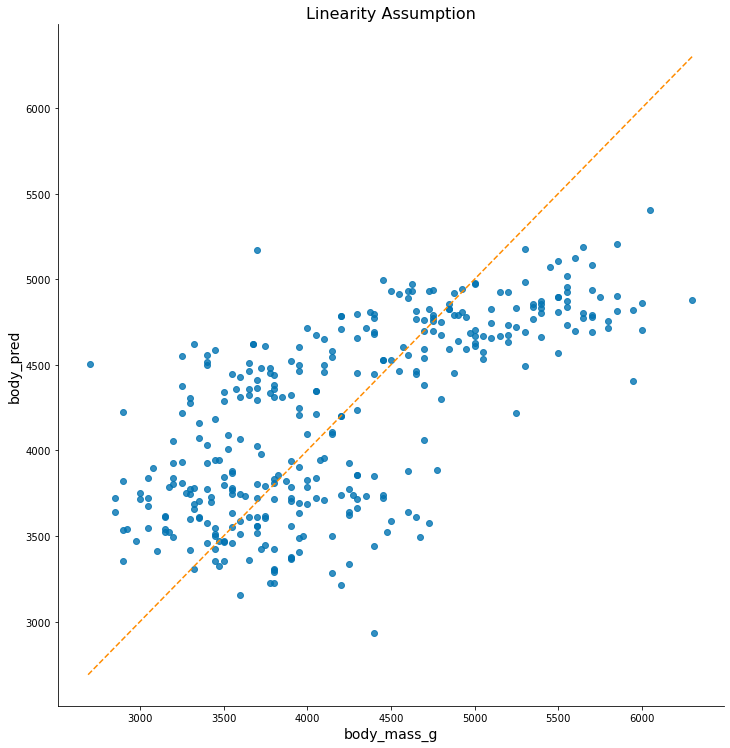

In [353]:
# Plot real x predição
sns.lmplot(x='body_mass_g', y='body_pred', data=penguins_est1, fit_reg=False, height=10)
    
# linha
line_coords = np.arange(penguins_est1[['body_mass_g','body_pred']].min().min()-10, 
                        penguins_est1[['body_mass_g','body_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('body_pred', fontsize=14)
plt.xlabel('body_mass_g', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

In [354]:
X = df_penguins[['culmen_length_mm']]
y = df_penguins['body_mass_g']
# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)
skl_preds = model.predict(X)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

print('Mean Absolute Error:', metrics.mean_absolute_error(y,skl_preds))
print('Mean Squared Error:', metrics.mean_squared_error(y,skl_preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,skl_preds)))
print('R_Squared: ',model.score(X,y))

Intercept: 362.30672165392116
Coefficients: [87.41527705]
Mean Absolute Error: 518.7988280373788
Mean Squared Error: 411740.19070469175
Root Mean Squared Error: 641.6698455628812
R_Squared:  0.35415570314218703


In [355]:
X = df_penguins[['culmen_length_mm']]
X = sm.add_constant(X) # adding a constant
olsmod = sm.OLS(df_penguins['body_mass_g'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     187.5
Date:                Sun, 18 Jul 2021   Prob (F-statistic):           2.45e-34
Time:                        14:22:47   Log-Likelihood:                -2711.8
No. Observations:                 344   AIC:                             5428.
Df Residuals:                     342   BIC:                             5435.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              362.3067    282.503  

In [356]:
penguins_est = df_penguins
penguins_est['body_pred'] = olsmod.predict(X)
penguins_est['residual'] = olsmod.resid
penguins_est.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,isl_spc,MALE,body_pred,residual
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE,Torgersen_Adelie,1,3780.244054,-3.024405e+01
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE,Torgersen_Adelie,0,3815.210165,-1.521017e+01
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE,Torgersen_Adelie,0,3885.142387,-6.351424e+02
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE,Torgersen_Adelie,1,4201.754386,-6.366463e-12
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE,Torgersen_Adelie,0,3570.447389,-1.204474e+02


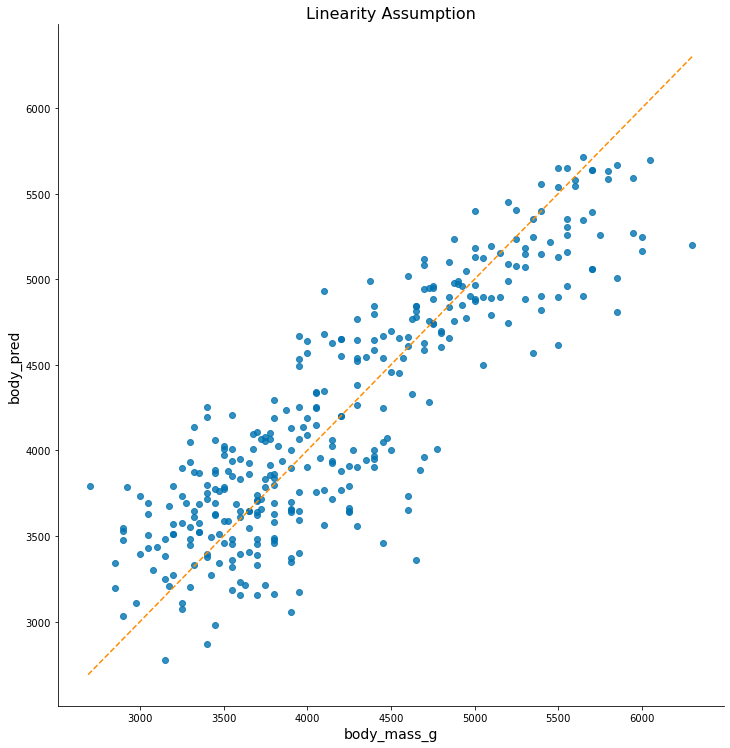

In [229]:
# Plot real x predição
sns.lmplot(x='body_mass_g', y='body_pred', data=penguins_est, fit_reg=False, height=10)
    
# linha
line_coords = np.arange(penguins_est[['body_mass_g','body_pred']].min().min()-10, 
                        penguins_est[['body_mass_g','body_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('body_pred', fontsize=14)
plt.xlabel('body_mass_g', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()